# Visualisation

This notebook will provide a few key visualisations for the general use of
Neko-Top. It relies heavily on paraview so that must be available. Please see
the documentation for information [Paraview](../documentation/Paraview.md).


In [1]:
# =============================================================================
# Setup the python environment

# Import the paraview modules.
try:
    from paraview.simple import *
except:
    import sys

    sys.path.append('/usr/local/lib/')
    sys.path.append('/usr/local/lib/python3.10/site-packages/')

    from paraview.simple import *

# Import the pyplot modules.
try:
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    %matplotlib widget

except:
    %pip install matplotlib ipympl

    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    %matplotlib widget

# Set the matplotlib background to be transparent
plt.rcParams['figure.facecolor'] = 'none'



In [2]:
%%html
<style>
.cell-output-ipywidget-background {
   background-color: transparent !important;
}
.jp-OutputArea-output {
   background-color: transparent;
}
</style>

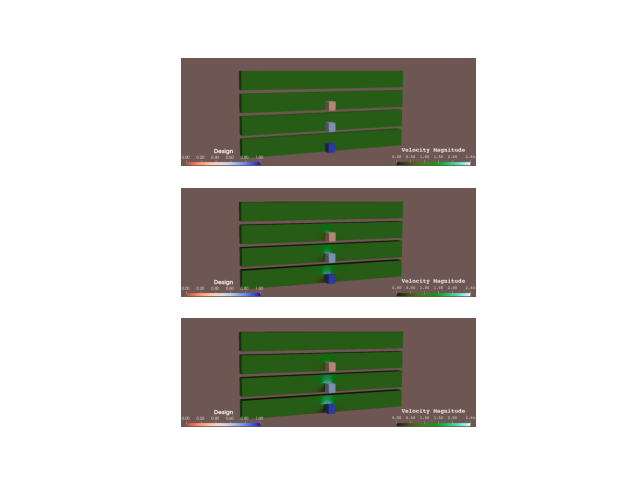

In [3]:
try:
    if STATE_LOADED:
        pass
except NameError:
    LoadState("../visualisation/debug_top.pvsm")
    STATE_LOADED = True

# Determine the number of timesteps
timesteps = GetAnimationScene().TimeKeeper.TimestepValues

# Set the time to the last timestep
GetAnimationScene().TimeKeeper.Time = timesteps[0]
SaveScreenshot("debug_top_0.png", magnification=1, quality=100, view=GetActiveView(), TransparentBackground=1)
GetAnimationScene().TimeKeeper.Time = timesteps[len(timesteps) // 2]
SaveScreenshot("debug_top_1.png", magnification=1, quality=100, view=GetActiveView(), TransparentBackground=1)
GetAnimationScene().TimeKeeper.Time = timesteps[-1]
SaveScreenshot("debug_top_2.png", magnification=1, quality=100, view=GetActiveView(), TransparentBackground=1)

file_names = ['0', '1', '2']

# create subplots instances
fig, axes = plt.subplots(len(file_names),1)
for name, ax in zip(file_names, axes.ravel()):
  image = mpimg.imread(f'debug_top_{name}.png')

  # plot image into the subplot
  ax.imshow(image[:,:,::-1])
  ax.axis('off')

# show the figure
plt.show()